In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [108]:
data = pd.read_csv('dataset_part2.csv')
x = pd.read_csv('dataset_part3a.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,7243.608962,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [109]:
x.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067
0,1,7243.608962,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
y = data['Class'].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
transform = StandardScaler().fit_transform(x)
transform

array([[-1.70943048,  0.        , -0.70880538, ..., -0.16222142,
        -0.13187609, -0.09284767],
       [-1.68005279, -1.29048681, -0.70880538, ..., -0.16222142,
        -0.13187609, -0.09284767],
       [-1.65067509, -1.26129118, -0.70880538, ..., -0.16222142,
        -0.13187609, -0.09284767],
       ...,
       [ 1.66900476,  0.        ,  0.60754747, ..., -0.16222142,
        -0.13187609, -0.09284767],
       [ 1.69838246,  1.60506624,  3.24025315, ..., -0.16222142,
        -0.13187609, -0.09284767],
       [ 1.72776016,  0.        ,  0.16876319, ...,  6.164414  ,
        -0.13187609, -0.09284767]])

In [113]:
xtrain, xtest, ytrain, ytest = train_test_split(transform, y, test_size = 0.2, random_state=2)

In [114]:
print(f"Test shape: {ytest.shape}")
print(f"Train shape: {ytrain.shape}")

Test shape: (24,)
Train shape: (93,)


In [115]:
parameters = [{'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}]

In [116]:
from sklearn.linear_model import Ridge
from sklearn import svm
svc = svm.SVC()

In [117]:
lr = LogisticRegression()

In [118]:
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(xtrain, ytrain)
logreg_cv.best_estimator_

LogisticRegression(C=0.01)

In [119]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7644444444444444


In [120]:
scores = logreg_cv.cv_results_

In [121]:
logreg_cv_test = GridSearchCV(lr, parameters, cv=6)
logreg_cv_test.fit(xtest, ytest)
logreg_cv_test.best_estimator_
print("tuned hpyerparameters :(best parameters) ",logreg_cv_test.best_params_)
print("accuracy :",logreg_cv_test.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.75


In [122]:
yhat = logreg_cv.predict(xtest)

In [123]:
cnf = confusion_matrix(ytest, yhat)

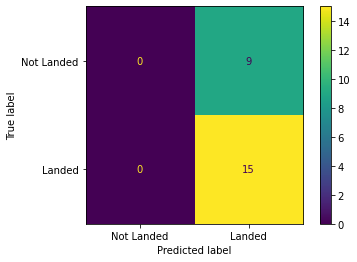

In [124]:
disp = ConfusionMatrixDisplay(cnf, display_labels = ['Not Landed', 'Landed'])
disp.plot()

In [125]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(xtrain, ytrain)
svm_cv.best_estimator_

SVC(C=31.622776601683793, gamma=0.03162277660168379, kernel='sigmoid')

In [126]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 31.622776601683793, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.7966666666666666


In [127]:
svm_cv_test = GridSearchCV(svm, parameters, cv=6)
svm_cv_test.fit(xtest, ytest)
svm_cv_test.best_estimator_
print("tuned hpyerparameters :(best parameters) ",svm_cv_test.best_params_)
print("accuracy :",svm_cv_test.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 1.0, 'kernel': 'sigmoid'}
accuracy : 0.9166666666666666


In [128]:
yhat = svm_cv.predict(xtest)
cnf2 = confusion_matrix(ytest, yhat)

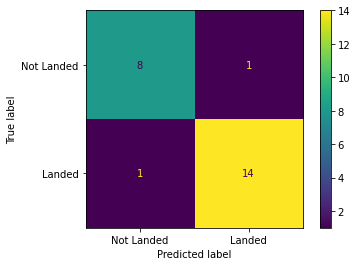

In [129]:
disp2 = ConfusionMatrixDisplay(cnf2, display_labels = ['Not Landed', 'Landed'])
disp2.plot()

In [130]:
#Decision Tree Classifier
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [131]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(xtrain, ytrain)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.828888888888889


In [132]:
from sklearn import metrics

In [133]:
predTree = tree_cv.predict(xtest)
metrics.accuracy_score(ytest, predTree)

0.625

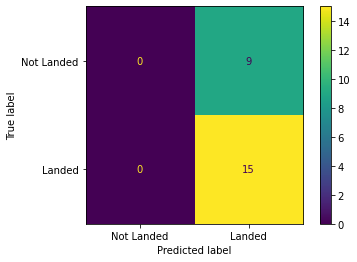

In [134]:
cnf3 = confusion_matrix(ytest, predTree)
disp3 = ConfusionMatrixDisplay(cnf3, display_labels=['Not Landed', 'Landed'])
disp3.plot()

In [135]:
#K Nearest Neighbors
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [136]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(xtrain, ytrain)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
accuracy : 0.7644444444444444


In [137]:
yhat = knn_cv.predict(xtest)
metrics.accuracy_score(ytest, yhat)

0.625

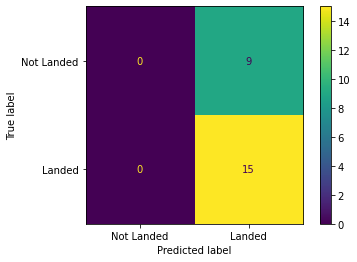

In [138]:
cnf4 = confusion_matrix(ytest, yhat)
disp4 = ConfusionMatrixDisplay(cnf4, display_labels = ['Not Landed', 'Landed'])
disp4.plot()

In [142]:
results2 = {'Model': ['LogReg', 'SVM', 'Decision Tree', 'KNN'], 'Accuracy': [logreg_cv_test.best_score_, svm_cv_test.best_score_, tree_cv.best_score_, knn_cv.best_score_]}

In [143]:
results2

{'Model': ['LogReg', 'SVM', 'Decision Tree', 'KNN'],
 'Accuracy': [0.75, 0.9166666666666666, 0.828888888888889, 0.7644444444444444]}

In [144]:
modelaccuracy = pd.DataFrame.from_dict(results2)
modelaccuracy

,Model,Accuracy
0,LogReg,0.750000
1,SVM,0.916667
2,Decision Tree,0.828889
3,KNN,0.764444


In [145]:
import seaborn as sns

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

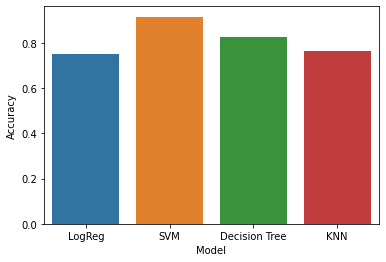

In [148]:
sns.barplot(x = 'Model', y = 'Accuracy', data = modelaccuracy)